# Word Embedding - Home Assigment
## Dr. Omri Allouche 2018. YData Deep Learning Course

[Open in Google Colab](https://colab.research.google.com/github/omriallouche/deep_learning_course/blob/master/DL_word_embedding_assignment.ipynb)
    
    
In this exercise, you'll use word vectors trained on a corpus of 380,000 lyrics of songs from MetroLyrics (https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics).  
The dataset contains these fields for each song, in CSV format:
1. index
1. song
1. year
1. artist
1. genre
1. lyrics

Before doing this exercise, we recommend that you go over the "Bag of words meets bag of popcorn" tutorial (https://www.kaggle.com/c/word2vec-nlp-tutorial)

Other recommended resources:
- https://rare-technologies.com/word2vec-tutorial/
- https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

### Train word vectors
Train word vectors using the Skipgram Word2vec algorithm and the gensim package.
Make sure you perform the following:
- Tokenize words
- Lowercase all words
- Remove punctuation marks
- Remove rare words
- Remove stopwords

Use 300 as the dimension of the word vectors. Try different context sizes.

In [90]:
import numpy as np
import pandas as pd
import os
import re
import nltk
from time import time
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [91]:
train = pd.read_csv('data/lyrics.csv', index_col=0)

In [92]:
train.dropna(subset=['lyrics'], inplace=True)

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guyja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
stops = set(stopwords.words('english'))
def lyrics_to_words (lyrics):
    letters_only = re.sub("[^a-zA-Z]", " ", lyrics)
    words = letters_only.lower().split()
    meaningful_words = [word for word in words if not word in stops]
    return meaningful_words

In [94]:
t = time()
train['clean_lyrics'] = train.lyrics.apply(lambda x: lyrics_to_words(x))
print('{} mins'.format(round((time() - t) / 60, 2)))

0.64 mins


In [20]:
sentences = train.clean_lyrics.to_list()

In [21]:
# w2v_model = Word2Vec(min_count=20,
#                      window=5,
#                      size=300,
#                      sample=6e-5, 
#                      alpha=0.03, 
#                      min_alpha=0.0007, 
#                      negative=20,
#                      workers=4,
#                      sg=1)

In [22]:
# t = time()

# w2v_model.build_vocab(sentences, progress_per=10000)

# print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 14:25:05: collecting all words and their counts
INFO - 14:25:05: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 14:25:06: PROGRESS: at sentence #10000, processed 1147030 words, keeping 56164 word types
INFO - 14:25:06: PROGRESS: at sentence #20000, processed 2369372 words, keeping 91682 word types
INFO - 14:25:06: PROGRESS: at sentence #30000, processed 3538230 words, keeping 107963 word types
INFO - 14:25:06: PROGRESS: at sentence #40000, processed 4799852 words, keeping 130265 word types
INFO - 14:25:06: PROGRESS: at sentence #50000, processed 5939943 words, keeping 151445 word types
INFO - 14:25:07: PROGRESS: at sentence #60000, processed 7172080 words, keeping 169102 word types
INFO - 14:25:07: PROGRESS: at sentence #70000, processed 8313429 words, keeping 184275 word types
INFO - 14:25:07: PROGRESS: at sentence #80000, processed 9500307 words, keeping 197297 word types
INFO - 14:25:07: PROGRESS: at sentence #90000, processed 10810672 words, keeping

Time to build vocab: 0.27 mins


In [23]:
# t = time()

# w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

# print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

INFO - 14:25:35: training model with 4 workers on 45511 vocabulary and 300 features, using sg=1 hs=0 sample=6e-05 negative=20 window=5
INFO - 14:25:36: EPOCH 1 - PROGRESS: at 0.33% examples, 73326 words/s, in_qsize 7, out_qsize 0
INFO - 14:25:37: EPOCH 1 - PROGRESS: at 0.76% examples, 75968 words/s, in_qsize 7, out_qsize 0
INFO - 14:25:38: EPOCH 1 - PROGRESS: at 1.43% examples, 79306 words/s, in_qsize 7, out_qsize 0
INFO - 14:25:39: EPOCH 1 - PROGRESS: at 2.07% examples, 81111 words/s, in_qsize 7, out_qsize 0
INFO - 14:25:40: EPOCH 1 - PROGRESS: at 2.38% examples, 81163 words/s, in_qsize 7, out_qsize 0
INFO - 14:25:41: EPOCH 1 - PROGRESS: at 3.03% examples, 81003 words/s, in_qsize 7, out_qsize 0
INFO - 14:25:42: EPOCH 1 - PROGRESS: at 3.59% examples, 80337 words/s, in_qsize 7, out_qsize 0
INFO - 14:25:43: EPOCH 1 - PROGRESS: at 4.19% examples, 80825 words/s, in_qsize 7, out_qsize 0
INFO - 14:25:44: EPOCH 1 - PROGRESS: at 4.74% examples, 81438 words/s, in_qsize 7, out_qsize 0
INFO - 14:

INFO - 14:27:05: EPOCH 1 - PROGRESS: at 38.33% examples, 74534 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:07: EPOCH 1 - PROGRESS: at 38.88% examples, 74545 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:08: EPOCH 1 - PROGRESS: at 39.37% examples, 74587 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:09: EPOCH 1 - PROGRESS: at 39.84% examples, 74530 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:10: EPOCH 1 - PROGRESS: at 40.34% examples, 74409 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:11: EPOCH 1 - PROGRESS: at 40.68% examples, 74234 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:12: EPOCH 1 - PROGRESS: at 41.29% examples, 74263 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:13: EPOCH 1 - PROGRESS: at 41.63% examples, 74170 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:14: EPOCH 1 - PROGRESS: at 41.96% examples, 74216 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:15: EPOCH 1 - PROGRESS: at 42.48% examples, 74197 words/s, in_qsize 7, out_qsize 0
INFO - 14:27:16: EPOCH 1 - PROGRESS: at 

INFO - 14:28:36: EPOCH 1 - PROGRESS: at 77.72% examples, 74292 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:37: EPOCH 1 - PROGRESS: at 78.23% examples, 74307 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:38: EPOCH 1 - PROGRESS: at 78.83% examples, 74311 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:39: EPOCH 1 - PROGRESS: at 79.28% examples, 74333 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:40: EPOCH 1 - PROGRESS: at 79.76% examples, 74322 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:41: EPOCH 1 - PROGRESS: at 80.23% examples, 74305 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:43: EPOCH 1 - PROGRESS: at 80.55% examples, 74280 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:44: EPOCH 1 - PROGRESS: at 80.76% examples, 74225 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:45: EPOCH 1 - PROGRESS: at 81.21% examples, 74179 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:46: EPOCH 1 - PROGRESS: at 81.74% examples, 74197 words/s, in_qsize 7, out_qsize 0
INFO - 14:28:47: EPOCH 1 - PROGRESS: at 

INFO - 14:30:05: EPOCH 2 - PROGRESS: at 10.95% examples, 61432 words/s, in_qsize 7, out_qsize 0
INFO - 14:30:06: EPOCH 2 - PROGRESS: at 11.24% examples, 61559 words/s, in_qsize 7, out_qsize 0
INFO - 14:30:07: EPOCH 2 - PROGRESS: at 11.57% examples, 61677 words/s, in_qsize 8, out_qsize 1
INFO - 14:30:08: EPOCH 2 - PROGRESS: at 11.76% examples, 61460 words/s, in_qsize 7, out_qsize 0
INFO - 14:30:09: EPOCH 2 - PROGRESS: at 12.29% examples, 61756 words/s, in_qsize 7, out_qsize 0
INFO - 14:30:10: EPOCH 2 - PROGRESS: at 12.88% examples, 62161 words/s, in_qsize 7, out_qsize 0
INFO - 14:30:11: EPOCH 2 - PROGRESS: at 13.31% examples, 62414 words/s, in_qsize 7, out_qsize 0
INFO - 14:30:12: EPOCH 2 - PROGRESS: at 13.77% examples, 62517 words/s, in_qsize 8, out_qsize 0
INFO - 14:30:13: EPOCH 2 - PROGRESS: at 14.13% examples, 62674 words/s, in_qsize 7, out_qsize 0
INFO - 14:30:14: EPOCH 2 - PROGRESS: at 14.54% examples, 62627 words/s, in_qsize 7, out_qsize 0
INFO - 14:30:15: EPOCH 2 - PROGRESS: at 

INFO - 14:31:35: EPOCH 2 - PROGRESS: at 45.99% examples, 66617 words/s, in_qsize 7, out_qsize 0
INFO - 14:31:36: EPOCH 2 - PROGRESS: at 46.40% examples, 66633 words/s, in_qsize 7, out_qsize 0
INFO - 14:31:37: EPOCH 2 - PROGRESS: at 46.79% examples, 66658 words/s, in_qsize 7, out_qsize 0
INFO - 14:31:38: EPOCH 2 - PROGRESS: at 47.14% examples, 66700 words/s, in_qsize 7, out_qsize 0
INFO - 14:31:39: EPOCH 2 - PROGRESS: at 47.49% examples, 66673 words/s, in_qsize 7, out_qsize 0
INFO - 14:31:40: EPOCH 2 - PROGRESS: at 47.93% examples, 66706 words/s, in_qsize 7, out_qsize 0
INFO - 14:31:41: EPOCH 2 - PROGRESS: at 48.24% examples, 66668 words/s, in_qsize 7, out_qsize 0
INFO - 14:31:43: EPOCH 2 - PROGRESS: at 48.64% examples, 66573 words/s, in_qsize 7, out_qsize 0
INFO - 14:31:44: EPOCH 2 - PROGRESS: at 49.01% examples, 66514 words/s, in_qsize 7, out_qsize 0
INFO - 14:31:45: EPOCH 2 - PROGRESS: at 49.33% examples, 66349 words/s, in_qsize 8, out_qsize 0
INFO - 14:31:46: EPOCH 2 - PROGRESS: at 

INFO - 14:33:07: EPOCH 2 - PROGRESS: at 77.79% examples, 63481 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:08: EPOCH 2 - PROGRESS: at 78.13% examples, 63406 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:09: EPOCH 2 - PROGRESS: at 78.65% examples, 63417 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:10: EPOCH 2 - PROGRESS: at 79.10% examples, 63429 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:11: EPOCH 2 - PROGRESS: at 79.31% examples, 63346 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:12: EPOCH 2 - PROGRESS: at 79.66% examples, 63275 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:13: EPOCH 2 - PROGRESS: at 80.14% examples, 63294 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:14: EPOCH 2 - PROGRESS: at 80.44% examples, 63245 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:15: EPOCH 2 - PROGRESS: at 80.60% examples, 63218 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:16: EPOCH 2 - PROGRESS: at 80.84% examples, 63172 words/s, in_qsize 7, out_qsize 0
INFO - 14:33:17: EPOCH 2 - PROGRESS: at 

INFO - 14:34:35: EPOCH 3 - PROGRESS: at 8.72% examples, 61169 words/s, in_qsize 7, out_qsize 0
INFO - 14:34:36: EPOCH 3 - PROGRESS: at 9.07% examples, 60655 words/s, in_qsize 8, out_qsize 0
INFO - 14:34:37: EPOCH 3 - PROGRESS: at 9.26% examples, 60516 words/s, in_qsize 7, out_qsize 0
INFO - 14:34:38: EPOCH 3 - PROGRESS: at 9.70% examples, 60824 words/s, in_qsize 7, out_qsize 0
INFO - 14:34:39: EPOCH 3 - PROGRESS: at 10.16% examples, 60807 words/s, in_qsize 7, out_qsize 0
INFO - 14:34:40: EPOCH 3 - PROGRESS: at 10.69% examples, 61189 words/s, in_qsize 7, out_qsize 0
INFO - 14:34:41: EPOCH 3 - PROGRESS: at 11.13% examples, 61208 words/s, in_qsize 7, out_qsize 0
INFO - 14:34:43: EPOCH 3 - PROGRESS: at 11.51% examples, 61554 words/s, in_qsize 7, out_qsize 0
INFO - 14:34:44: EPOCH 3 - PROGRESS: at 11.71% examples, 61840 words/s, in_qsize 7, out_qsize 0
INFO - 14:34:45: EPOCH 3 - PROGRESS: at 11.99% examples, 61283 words/s, in_qsize 7, out_qsize 0
INFO - 14:34:46: EPOCH 3 - PROGRESS: at 12.5

INFO - 14:36:08: EPOCH 3 - PROGRESS: at 42.31% examples, 63305 words/s, in_qsize 8, out_qsize 0
INFO - 14:36:09: EPOCH 3 - PROGRESS: at 42.76% examples, 63388 words/s, in_qsize 7, out_qsize 0
INFO - 14:36:10: EPOCH 3 - PROGRESS: at 43.18% examples, 63430 words/s, in_qsize 7, out_qsize 0
INFO - 14:36:11: EPOCH 3 - PROGRESS: at 43.66% examples, 63517 words/s, in_qsize 7, out_qsize 0
INFO - 14:36:12: EPOCH 3 - PROGRESS: at 44.15% examples, 63588 words/s, in_qsize 7, out_qsize 0
INFO - 14:36:13: EPOCH 3 - PROGRESS: at 44.51% examples, 63622 words/s, in_qsize 8, out_qsize 0
INFO - 14:36:14: EPOCH 3 - PROGRESS: at 44.81% examples, 63608 words/s, in_qsize 7, out_qsize 0
INFO - 14:36:15: EPOCH 3 - PROGRESS: at 45.33% examples, 63658 words/s, in_qsize 7, out_qsize 0
INFO - 14:36:16: EPOCH 3 - PROGRESS: at 45.76% examples, 63779 words/s, in_qsize 7, out_qsize 0
INFO - 14:36:17: EPOCH 3 - PROGRESS: at 46.19% examples, 63868 words/s, in_qsize 7, out_qsize 0
INFO - 14:36:18: EPOCH 3 - PROGRESS: at 

INFO - 14:37:39: EPOCH 3 - PROGRESS: at 78.62% examples, 65282 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:40: EPOCH 3 - PROGRESS: at 79.03% examples, 65265 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:41: EPOCH 3 - PROGRESS: at 79.37% examples, 65269 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:42: EPOCH 3 - PROGRESS: at 79.76% examples, 65233 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:43: EPOCH 3 - PROGRESS: at 80.21% examples, 65231 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:44: EPOCH 3 - PROGRESS: at 80.50% examples, 65182 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:45: EPOCH 3 - PROGRESS: at 80.65% examples, 65176 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:46: EPOCH 3 - PROGRESS: at 81.04% examples, 65169 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:48: EPOCH 3 - PROGRESS: at 81.46% examples, 65145 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:49: EPOCH 3 - PROGRESS: at 81.87% examples, 65164 words/s, in_qsize 7, out_qsize 0
INFO - 14:37:50: EPOCH 3 - PROGRESS: at 

INFO - 14:39:08: EPOCH 4 - PROGRESS: at 11.00% examples, 71749 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:09: EPOCH 4 - PROGRESS: at 11.28% examples, 71678 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:10: EPOCH 4 - PROGRESS: at 11.62% examples, 71702 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:11: EPOCH 4 - PROGRESS: at 11.99% examples, 71462 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:12: EPOCH 4 - PROGRESS: at 12.57% examples, 71537 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:13: EPOCH 4 - PROGRESS: at 13.02% examples, 71523 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:15: EPOCH 4 - PROGRESS: at 13.59% examples, 71621 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:16: EPOCH 4 - PROGRESS: at 13.98% examples, 71846 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:17: EPOCH 4 - PROGRESS: at 14.43% examples, 71614 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:18: EPOCH 4 - PROGRESS: at 14.67% examples, 71491 words/s, in_qsize 7, out_qsize 0
INFO - 14:39:19: EPOCH 4 - PROGRESS: at 

INFO - 14:40:40: EPOCH 4 - PROGRESS: at 45.50% examples, 67363 words/s, in_qsize 7, out_qsize 0
INFO - 14:40:41: EPOCH 4 - PROGRESS: at 45.82% examples, 67384 words/s, in_qsize 7, out_qsize 0
INFO - 14:40:42: EPOCH 4 - PROGRESS: at 46.24% examples, 67349 words/s, in_qsize 7, out_qsize 0
INFO - 14:40:44: EPOCH 4 - PROGRESS: at 46.71% examples, 67294 words/s, in_qsize 7, out_qsize 0
INFO - 14:40:45: EPOCH 4 - PROGRESS: at 46.98% examples, 67322 words/s, in_qsize 7, out_qsize 0
INFO - 14:40:46: EPOCH 4 - PROGRESS: at 47.43% examples, 67305 words/s, in_qsize 7, out_qsize 0
INFO - 14:40:47: EPOCH 4 - PROGRESS: at 47.80% examples, 67309 words/s, in_qsize 7, out_qsize 0
INFO - 14:40:48: EPOCH 4 - PROGRESS: at 48.10% examples, 67226 words/s, in_qsize 7, out_qsize 0
INFO - 14:40:49: EPOCH 4 - PROGRESS: at 48.51% examples, 67207 words/s, in_qsize 7, out_qsize 0
INFO - 14:40:50: EPOCH 4 - PROGRESS: at 48.96% examples, 67202 words/s, in_qsize 8, out_qsize 0
INFO - 14:40:51: EPOCH 4 - PROGRESS: at 

INFO - 14:42:13: EPOCH 4 - PROGRESS: at 77.55% examples, 63875 words/s, in_qsize 8, out_qsize 0
INFO - 14:42:14: EPOCH 4 - PROGRESS: at 78.00% examples, 63847 words/s, in_qsize 7, out_qsize 0
INFO - 14:42:15: EPOCH 4 - PROGRESS: at 78.58% examples, 63895 words/s, in_qsize 7, out_qsize 0
INFO - 14:42:16: EPOCH 4 - PROGRESS: at 79.03% examples, 63878 words/s, in_qsize 7, out_qsize 0
INFO - 14:42:17: EPOCH 4 - PROGRESS: at 79.37% examples, 63896 words/s, in_qsize 7, out_qsize 0
INFO - 14:42:18: EPOCH 4 - PROGRESS: at 79.65% examples, 63771 words/s, in_qsize 6, out_qsize 1
INFO - 14:42:19: EPOCH 4 - PROGRESS: at 79.98% examples, 63712 words/s, in_qsize 7, out_qsize 0
INFO - 14:42:21: EPOCH 4 - PROGRESS: at 80.42% examples, 63723 words/s, in_qsize 7, out_qsize 0
INFO - 14:42:22: EPOCH 4 - PROGRESS: at 80.61% examples, 63723 words/s, in_qsize 7, out_qsize 0
INFO - 14:42:23: EPOCH 4 - PROGRESS: at 80.95% examples, 63721 words/s, in_qsize 7, out_qsize 0
INFO - 14:42:24: EPOCH 4 - PROGRESS: at 

INFO - 14:43:42: EPOCH 5 - PROGRESS: at 6.19% examples, 49701 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:43: EPOCH 5 - PROGRESS: at 6.44% examples, 49925 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:44: EPOCH 5 - PROGRESS: at 6.86% examples, 50087 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:45: EPOCH 5 - PROGRESS: at 7.32% examples, 50833 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:46: EPOCH 5 - PROGRESS: at 7.67% examples, 51303 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:47: EPOCH 5 - PROGRESS: at 8.13% examples, 51809 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:49: EPOCH 5 - PROGRESS: at 8.59% examples, 51822 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:50: EPOCH 5 - PROGRESS: at 8.99% examples, 51930 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:51: EPOCH 5 - PROGRESS: at 9.14% examples, 52270 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:52: EPOCH 5 - PROGRESS: at 9.61% examples, 52978 words/s, in_qsize 7, out_qsize 0
INFO - 14:43:53: EPOCH 5 - PROGRESS: at 10.08% exa

INFO - 14:45:14: EPOCH 5 - PROGRESS: at 39.03% examples, 60435 words/s, in_qsize 7, out_qsize 0
INFO - 14:45:15: EPOCH 5 - PROGRESS: at 39.41% examples, 60404 words/s, in_qsize 7, out_qsize 0
INFO - 14:45:16: EPOCH 5 - PROGRESS: at 39.81% examples, 60395 words/s, in_qsize 7, out_qsize 0
INFO - 14:45:17: EPOCH 5 - PROGRESS: at 40.20% examples, 60394 words/s, in_qsize 7, out_qsize 0
INFO - 14:45:18: EPOCH 5 - PROGRESS: at 40.60% examples, 60358 words/s, in_qsize 7, out_qsize 0
INFO - 14:45:19: EPOCH 5 - PROGRESS: at 41.03% examples, 60438 words/s, in_qsize 7, out_qsize 0
INFO - 14:45:20: EPOCH 5 - PROGRESS: at 41.46% examples, 60403 words/s, in_qsize 7, out_qsize 0
INFO - 14:45:21: EPOCH 5 - PROGRESS: at 41.72% examples, 60312 words/s, in_qsize 7, out_qsize 0
INFO - 14:45:22: EPOCH 5 - PROGRESS: at 41.96% examples, 60296 words/s, in_qsize 8, out_qsize 0
INFO - 14:45:24: EPOCH 5 - PROGRESS: at 42.28% examples, 60151 words/s, in_qsize 7, out_qsize 0
INFO - 14:45:25: EPOCH 5 - PROGRESS: at 

INFO - 14:46:46: EPOCH 5 - PROGRESS: at 71.75% examples, 60627 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:48: EPOCH 5 - PROGRESS: at 72.16% examples, 60623 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:49: EPOCH 5 - PROGRESS: at 72.62% examples, 60649 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:50: EPOCH 5 - PROGRESS: at 72.98% examples, 60642 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:51: EPOCH 5 - PROGRESS: at 73.31% examples, 60657 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:52: EPOCH 5 - PROGRESS: at 73.59% examples, 60664 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:53: EPOCH 5 - PROGRESS: at 74.00% examples, 60627 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:54: EPOCH 5 - PROGRESS: at 74.67% examples, 60701 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:55: EPOCH 5 - PROGRESS: at 75.05% examples, 60678 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:56: EPOCH 5 - PROGRESS: at 75.40% examples, 60695 words/s, in_qsize 7, out_qsize 0
INFO - 14:46:57: EPOCH 5 - PROGRESS: at 

INFO - 14:48:14: EPOCH 6 - PROGRESS: at 4.65% examples, 61731 words/s, in_qsize 7, out_qsize 0
INFO - 14:48:15: EPOCH 6 - PROGRESS: at 4.98% examples, 60138 words/s, in_qsize 7, out_qsize 0
INFO - 14:48:16: EPOCH 6 - PROGRESS: at 5.22% examples, 59079 words/s, in_qsize 8, out_qsize 0
INFO - 14:48:18: EPOCH 6 - PROGRESS: at 5.50% examples, 58696 words/s, in_qsize 7, out_qsize 0
INFO - 14:48:19: EPOCH 6 - PROGRESS: at 5.82% examples, 58590 words/s, in_qsize 7, out_qsize 0
INFO - 14:48:20: EPOCH 6 - PROGRESS: at 6.11% examples, 58044 words/s, in_qsize 7, out_qsize 0
INFO - 14:48:21: EPOCH 6 - PROGRESS: at 6.44% examples, 59310 words/s, in_qsize 7, out_qsize 0
INFO - 14:48:22: EPOCH 6 - PROGRESS: at 6.80% examples, 58276 words/s, in_qsize 7, out_qsize 0
INFO - 14:48:23: EPOCH 6 - PROGRESS: at 7.17% examples, 58251 words/s, in_qsize 7, out_qsize 0
INFO - 14:48:24: EPOCH 6 - PROGRESS: at 7.48% examples, 58196 words/s, in_qsize 7, out_qsize 0
INFO - 14:48:25: EPOCH 6 - PROGRESS: at 7.92% exam

INFO - 14:49:47: EPOCH 6 - PROGRESS: at 34.97% examples, 58502 words/s, in_qsize 7, out_qsize 0
INFO - 14:49:48: EPOCH 6 - PROGRESS: at 35.33% examples, 58590 words/s, in_qsize 7, out_qsize 0
INFO - 14:49:49: EPOCH 6 - PROGRESS: at 35.76% examples, 58660 words/s, in_qsize 7, out_qsize 0
INFO - 14:49:50: EPOCH 6 - PROGRESS: at 36.13% examples, 58701 words/s, in_qsize 7, out_qsize 0
INFO - 14:49:51: EPOCH 6 - PROGRESS: at 36.50% examples, 58714 words/s, in_qsize 8, out_qsize 0
INFO - 14:49:52: EPOCH 6 - PROGRESS: at 36.93% examples, 58833 words/s, in_qsize 7, out_qsize 0
INFO - 14:49:53: EPOCH 6 - PROGRESS: at 37.30% examples, 58920 words/s, in_qsize 7, out_qsize 0
INFO - 14:49:54: EPOCH 6 - PROGRESS: at 37.61% examples, 58936 words/s, in_qsize 7, out_qsize 0
INFO - 14:49:55: EPOCH 6 - PROGRESS: at 37.98% examples, 59009 words/s, in_qsize 7, out_qsize 0
INFO - 14:49:56: EPOCH 6 - PROGRESS: at 38.44% examples, 59165 words/s, in_qsize 7, out_qsize 0
INFO - 14:49:57: EPOCH 6 - PROGRESS: at 

INFO - 14:51:18: EPOCH 6 - PROGRESS: at 69.92% examples, 61895 words/s, in_qsize 8, out_qsize 0
INFO - 14:51:19: EPOCH 6 - PROGRESS: at 70.33% examples, 61892 words/s, in_qsize 7, out_qsize 0
INFO - 14:51:20: EPOCH 6 - PROGRESS: at 70.82% examples, 61914 words/s, in_qsize 7, out_qsize 0
INFO - 14:51:21: EPOCH 6 - PROGRESS: at 71.14% examples, 61977 words/s, in_qsize 7, out_qsize 0
INFO - 14:51:22: EPOCH 6 - PROGRESS: at 71.51% examples, 61971 words/s, in_qsize 7, out_qsize 0
INFO - 14:51:23: EPOCH 6 - PROGRESS: at 71.89% examples, 62005 words/s, in_qsize 7, out_qsize 0
INFO - 14:51:24: EPOCH 6 - PROGRESS: at 72.27% examples, 62009 words/s, in_qsize 7, out_qsize 0
INFO - 14:51:25: EPOCH 6 - PROGRESS: at 72.69% examples, 62045 words/s, in_qsize 7, out_qsize 0
INFO - 14:51:26: EPOCH 6 - PROGRESS: at 73.07% examples, 62012 words/s, in_qsize 7, out_qsize 0
INFO - 14:51:28: EPOCH 6 - PROGRESS: at 73.30% examples, 61985 words/s, in_qsize 7, out_qsize 0
INFO - 14:51:29: EPOCH 6 - PROGRESS: at 

INFO - 14:52:45: EPOCH 7 - PROGRESS: at 2.30% examples, 61334 words/s, in_qsize 7, out_qsize 0
INFO - 14:52:46: EPOCH 7 - PROGRESS: at 2.65% examples, 61646 words/s, in_qsize 7, out_qsize 0
INFO - 14:52:47: EPOCH 7 - PROGRESS: at 3.13% examples, 62767 words/s, in_qsize 7, out_qsize 0
INFO - 14:52:48: EPOCH 7 - PROGRESS: at 3.59% examples, 61814 words/s, in_qsize 7, out_qsize 0
INFO - 14:52:49: EPOCH 7 - PROGRESS: at 4.04% examples, 61463 words/s, in_qsize 8, out_qsize 0
INFO - 14:52:50: EPOCH 7 - PROGRESS: at 4.43% examples, 61945 words/s, in_qsize 7, out_qsize 0
INFO - 14:52:51: EPOCH 7 - PROGRESS: at 4.94% examples, 63255 words/s, in_qsize 7, out_qsize 0
INFO - 14:52:52: EPOCH 7 - PROGRESS: at 5.28% examples, 63260 words/s, in_qsize 8, out_qsize 0
INFO - 14:52:53: EPOCH 7 - PROGRESS: at 5.56% examples, 62965 words/s, in_qsize 7, out_qsize 0
INFO - 14:52:55: EPOCH 7 - PROGRESS: at 5.99% examples, 63790 words/s, in_qsize 7, out_qsize 0
INFO - 14:52:56: EPOCH 7 - PROGRESS: at 6.35% exam

INFO - 14:54:17: EPOCH 7 - PROGRESS: at 35.96% examples, 64061 words/s, in_qsize 7, out_qsize 0
INFO - 14:54:18: EPOCH 7 - PROGRESS: at 36.32% examples, 64068 words/s, in_qsize 7, out_qsize 0
INFO - 14:54:19: EPOCH 7 - PROGRESS: at 36.73% examples, 63999 words/s, in_qsize 8, out_qsize 1
INFO - 14:54:20: EPOCH 7 - PROGRESS: at 37.08% examples, 64115 words/s, in_qsize 8, out_qsize 0
INFO - 14:54:21: EPOCH 7 - PROGRESS: at 37.56% examples, 64175 words/s, in_qsize 7, out_qsize 0
INFO - 14:54:22: EPOCH 7 - PROGRESS: at 37.86% examples, 64229 words/s, in_qsize 7, out_qsize 0
INFO - 14:54:23: EPOCH 7 - PROGRESS: at 38.22% examples, 64234 words/s, in_qsize 7, out_qsize 0
INFO - 14:54:24: EPOCH 7 - PROGRESS: at 38.56% examples, 64140 words/s, in_qsize 7, out_qsize 0
INFO - 14:54:25: EPOCH 7 - PROGRESS: at 39.03% examples, 64143 words/s, in_qsize 7, out_qsize 0
INFO - 14:54:26: EPOCH 7 - PROGRESS: at 39.40% examples, 64121 words/s, in_qsize 8, out_qsize 0
INFO - 14:54:27: EPOCH 7 - PROGRESS: at 

INFO - 14:55:49: EPOCH 7 - PROGRESS: at 69.12% examples, 62987 words/s, in_qsize 8, out_qsize 0
INFO - 14:55:50: EPOCH 7 - PROGRESS: at 69.48% examples, 63025 words/s, in_qsize 7, out_qsize 0
INFO - 14:55:51: EPOCH 7 - PROGRESS: at 69.94% examples, 63039 words/s, in_qsize 7, out_qsize 0
INFO - 14:55:52: EPOCH 7 - PROGRESS: at 70.40% examples, 63068 words/s, in_qsize 7, out_qsize 0
INFO - 14:55:53: EPOCH 7 - PROGRESS: at 70.82% examples, 63099 words/s, in_qsize 7, out_qsize 0
INFO - 14:55:54: EPOCH 7 - PROGRESS: at 71.08% examples, 63047 words/s, in_qsize 7, out_qsize 0
INFO - 14:55:55: EPOCH 7 - PROGRESS: at 71.37% examples, 63054 words/s, in_qsize 7, out_qsize 0
INFO - 14:55:56: EPOCH 7 - PROGRESS: at 71.75% examples, 63077 words/s, in_qsize 7, out_qsize 0
INFO - 14:55:57: EPOCH 7 - PROGRESS: at 72.16% examples, 63078 words/s, in_qsize 7, out_qsize 0
INFO - 14:55:58: EPOCH 7 - PROGRESS: at 72.62% examples, 63104 words/s, in_qsize 7, out_qsize 0
INFO - 14:55:59: EPOCH 7 - PROGRESS: at 

INFO - 14:57:16: EPOCH 8 - PROGRESS: at 0.17% examples, 40518 words/s, in_qsize 7, out_qsize 0
INFO - 14:57:17: EPOCH 8 - PROGRESS: at 0.58% examples, 55560 words/s, in_qsize 6, out_qsize 1
INFO - 14:57:18: EPOCH 8 - PROGRESS: at 1.07% examples, 58817 words/s, in_qsize 7, out_qsize 0
INFO - 14:57:19: EPOCH 8 - PROGRESS: at 1.54% examples, 59797 words/s, in_qsize 7, out_qsize 0
INFO - 14:57:20: EPOCH 8 - PROGRESS: at 2.07% examples, 61132 words/s, in_qsize 7, out_qsize 0
INFO - 14:57:21: EPOCH 8 - PROGRESS: at 2.34% examples, 62145 words/s, in_qsize 7, out_qsize 0
INFO - 14:57:22: EPOCH 8 - PROGRESS: at 2.73% examples, 62323 words/s, in_qsize 7, out_qsize 0
INFO - 14:57:24: EPOCH 8 - PROGRESS: at 3.17% examples, 61897 words/s, in_qsize 7, out_qsize 0
INFO - 14:57:25: EPOCH 8 - PROGRESS: at 3.67% examples, 62786 words/s, in_qsize 7, out_qsize 0
INFO - 14:57:26: EPOCH 8 - PROGRESS: at 4.14% examples, 63034 words/s, in_qsize 7, out_qsize 0
INFO - 14:57:27: EPOCH 8 - PROGRESS: at 4.46% exam

INFO - 14:58:48: EPOCH 8 - PROGRESS: at 32.70% examples, 60463 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:49: EPOCH 8 - PROGRESS: at 32.85% examples, 60167 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:50: EPOCH 8 - PROGRESS: at 33.19% examples, 60094 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:51: EPOCH 8 - PROGRESS: at 33.57% examples, 60059 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:52: EPOCH 8 - PROGRESS: at 33.81% examples, 59985 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:53: EPOCH 8 - PROGRESS: at 34.23% examples, 60089 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:54: EPOCH 8 - PROGRESS: at 34.47% examples, 60218 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:56: EPOCH 8 - PROGRESS: at 34.73% examples, 60192 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:57: EPOCH 8 - PROGRESS: at 34.99% examples, 60240 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:58: EPOCH 8 - PROGRESS: at 35.35% examples, 60294 words/s, in_qsize 7, out_qsize 0
INFO - 14:58:59: EPOCH 8 - PROGRESS: at 

INFO - 15:00:20: EPOCH 8 - PROGRESS: at 65.11% examples, 60665 words/s, in_qsize 7, out_qsize 0
INFO - 15:00:21: EPOCH 8 - PROGRESS: at 65.56% examples, 60710 words/s, in_qsize 7, out_qsize 0
INFO - 15:00:22: EPOCH 8 - PROGRESS: at 66.03% examples, 60744 words/s, in_qsize 7, out_qsize 0
INFO - 15:00:23: EPOCH 8 - PROGRESS: at 66.42% examples, 60764 words/s, in_qsize 8, out_qsize 1
INFO - 15:00:24: EPOCH 8 - PROGRESS: at 66.70% examples, 60794 words/s, in_qsize 8, out_qsize 0
INFO - 15:00:25: EPOCH 8 - PROGRESS: at 67.10% examples, 60864 words/s, in_qsize 7, out_qsize 0
INFO - 15:00:26: EPOCH 8 - PROGRESS: at 67.38% examples, 60849 words/s, in_qsize 7, out_qsize 0
INFO - 15:00:27: EPOCH 8 - PROGRESS: at 67.73% examples, 60845 words/s, in_qsize 7, out_qsize 0
INFO - 15:00:28: EPOCH 8 - PROGRESS: at 68.07% examples, 60872 words/s, in_qsize 7, out_qsize 0
INFO - 15:00:30: EPOCH 8 - PROGRESS: at 68.46% examples, 60891 words/s, in_qsize 7, out_qsize 0
INFO - 15:00:31: EPOCH 8 - PROGRESS: at 

INFO - 15:01:51: EPOCH 8 - PROGRESS: at 97.03% examples, 60976 words/s, in_qsize 7, out_qsize 0
INFO - 15:01:52: EPOCH 8 - PROGRESS: at 97.41% examples, 61005 words/s, in_qsize 7, out_qsize 0
INFO - 15:01:53: EPOCH 8 - PROGRESS: at 97.88% examples, 61050 words/s, in_qsize 7, out_qsize 0
INFO - 15:01:54: EPOCH 8 - PROGRESS: at 98.27% examples, 61050 words/s, in_qsize 7, out_qsize 0
INFO - 15:01:55: EPOCH 8 - PROGRESS: at 98.70% examples, 61076 words/s, in_qsize 7, out_qsize 0
INFO - 15:01:56: EPOCH 8 - PROGRESS: at 99.01% examples, 61106 words/s, in_qsize 7, out_qsize 0
INFO - 15:01:57: EPOCH 8 - PROGRESS: at 99.38% examples, 61117 words/s, in_qsize 7, out_qsize 0
INFO - 15:01:58: EPOCH 8 - PROGRESS: at 99.76% examples, 61125 words/s, in_qsize 6, out_qsize 0
INFO - 15:01:59: worker thread finished; awaiting finish of 3 more threads
INFO - 15:01:59: worker thread finished; awaiting finish of 2 more threads
INFO - 15:01:59: worker thread finished; awaiting finish of 1 more threads
INFO - 

INFO - 15:03:20: EPOCH 9 - PROGRESS: at 28.74% examples, 61064 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:21: EPOCH 9 - PROGRESS: at 29.11% examples, 60953 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:22: EPOCH 9 - PROGRESS: at 29.39% examples, 60826 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:23: EPOCH 9 - PROGRESS: at 29.83% examples, 60819 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:24: EPOCH 9 - PROGRESS: at 30.18% examples, 60767 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:25: EPOCH 9 - PROGRESS: at 30.59% examples, 60828 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:26: EPOCH 9 - PROGRESS: at 31.06% examples, 60965 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:27: EPOCH 9 - PROGRESS: at 31.48% examples, 60954 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:28: EPOCH 9 - PROGRESS: at 31.81% examples, 61041 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:29: EPOCH 9 - PROGRESS: at 32.11% examples, 61051 words/s, in_qsize 7, out_qsize 0
INFO - 15:03:30: EPOCH 9 - PROGRESS: at 

INFO - 15:04:51: EPOCH 9 - PROGRESS: at 59.57% examples, 60187 words/s, in_qsize 7, out_qsize 0
INFO - 15:04:52: EPOCH 9 - PROGRESS: at 60.03% examples, 60216 words/s, in_qsize 7, out_qsize 0
INFO - 15:04:53: EPOCH 9 - PROGRESS: at 60.43% examples, 60230 words/s, in_qsize 7, out_qsize 0
INFO - 15:04:54: EPOCH 9 - PROGRESS: at 60.90% examples, 60221 words/s, in_qsize 8, out_qsize 0
INFO - 15:04:55: EPOCH 9 - PROGRESS: at 61.29% examples, 60212 words/s, in_qsize 7, out_qsize 0
INFO - 15:04:57: EPOCH 9 - PROGRESS: at 61.69% examples, 60226 words/s, in_qsize 7, out_qsize 0
INFO - 15:04:58: EPOCH 9 - PROGRESS: at 62.19% examples, 60216 words/s, in_qsize 7, out_qsize 0
INFO - 15:04:59: EPOCH 9 - PROGRESS: at 62.52% examples, 60223 words/s, in_qsize 7, out_qsize 0
INFO - 15:05:00: EPOCH 9 - PROGRESS: at 62.94% examples, 60254 words/s, in_qsize 7, out_qsize 0
INFO - 15:05:01: EPOCH 9 - PROGRESS: at 63.28% examples, 60244 words/s, in_qsize 7, out_qsize 0
INFO - 15:05:02: EPOCH 9 - PROGRESS: at 

INFO - 15:06:23: EPOCH 9 - PROGRESS: at 93.75% examples, 61180 words/s, in_qsize 8, out_qsize 0
INFO - 15:06:24: EPOCH 9 - PROGRESS: at 94.03% examples, 61174 words/s, in_qsize 7, out_qsize 0
INFO - 15:06:26: EPOCH 9 - PROGRESS: at 94.39% examples, 61202 words/s, in_qsize 7, out_qsize 0
INFO - 15:06:27: EPOCH 9 - PROGRESS: at 94.78% examples, 61213 words/s, in_qsize 7, out_qsize 0
INFO - 15:06:28: EPOCH 9 - PROGRESS: at 95.17% examples, 61251 words/s, in_qsize 7, out_qsize 0
INFO - 15:06:29: EPOCH 9 - PROGRESS: at 95.50% examples, 61222 words/s, in_qsize 7, out_qsize 0
INFO - 15:06:30: EPOCH 9 - PROGRESS: at 95.60% examples, 61133 words/s, in_qsize 7, out_qsize 0
INFO - 15:06:31: EPOCH 9 - PROGRESS: at 95.83% examples, 61117 words/s, in_qsize 7, out_qsize 0
INFO - 15:06:32: EPOCH 9 - PROGRESS: at 96.22% examples, 61143 words/s, in_qsize 7, out_qsize 0
INFO - 15:06:33: EPOCH 9 - PROGRESS: at 96.67% examples, 61190 words/s, in_qsize 7, out_qsize 0
INFO - 15:06:34: EPOCH 9 - PROGRESS: at 

INFO - 15:07:50: EPOCH 10 - PROGRESS: at 24.33% examples, 61966 words/s, in_qsize 7, out_qsize 0
INFO - 15:07:51: EPOCH 10 - PROGRESS: at 24.82% examples, 62081 words/s, in_qsize 7, out_qsize 0
INFO - 15:07:52: EPOCH 10 - PROGRESS: at 25.16% examples, 61946 words/s, in_qsize 7, out_qsize 0
INFO - 15:07:53: EPOCH 10 - PROGRESS: at 25.55% examples, 61839 words/s, in_qsize 7, out_qsize 0
INFO - 15:07:54: EPOCH 10 - PROGRESS: at 25.96% examples, 61733 words/s, in_qsize 7, out_qsize 0
INFO - 15:07:55: EPOCH 10 - PROGRESS: at 26.39% examples, 61891 words/s, in_qsize 7, out_qsize 0
INFO - 15:07:57: EPOCH 10 - PROGRESS: at 26.78% examples, 61678 words/s, in_qsize 7, out_qsize 0
INFO - 15:07:58: EPOCH 10 - PROGRESS: at 27.17% examples, 61715 words/s, in_qsize 8, out_qsize 0
INFO - 15:07:59: EPOCH 10 - PROGRESS: at 27.53% examples, 61796 words/s, in_qsize 7, out_qsize 0
INFO - 15:08:00: EPOCH 10 - PROGRESS: at 27.84% examples, 61693 words/s, in_qsize 7, out_qsize 0
INFO - 15:08:01: EPOCH 10 - PR

INFO - 15:09:21: EPOCH 10 - PROGRESS: at 55.52% examples, 61279 words/s, in_qsize 8, out_qsize 0
INFO - 15:09:22: EPOCH 10 - PROGRESS: at 55.95% examples, 61343 words/s, in_qsize 7, out_qsize 0
INFO - 15:09:23: EPOCH 10 - PROGRESS: at 56.44% examples, 61362 words/s, in_qsize 7, out_qsize 0
INFO - 15:09:24: EPOCH 10 - PROGRESS: at 56.81% examples, 61342 words/s, in_qsize 7, out_qsize 0
INFO - 15:09:25: EPOCH 10 - PROGRESS: at 56.98% examples, 61104 words/s, in_qsize 7, out_qsize 0
INFO - 15:09:26: EPOCH 10 - PROGRESS: at 57.28% examples, 61025 words/s, in_qsize 7, out_qsize 0
INFO - 15:09:27: EPOCH 10 - PROGRESS: at 57.55% examples, 60994 words/s, in_qsize 7, out_qsize 0
INFO - 15:09:28: EPOCH 10 - PROGRESS: at 58.01% examples, 61052 words/s, in_qsize 7, out_qsize 0
INFO - 15:09:29: EPOCH 10 - PROGRESS: at 58.39% examples, 61040 words/s, in_qsize 7, out_qsize 0
INFO - 15:09:30: EPOCH 10 - PROGRESS: at 58.76% examples, 61003 words/s, in_qsize 8, out_qsize 0
INFO - 15:09:31: EPOCH 10 - PR

INFO - 15:10:51: EPOCH 10 - PROGRESS: at 88.78% examples, 61863 words/s, in_qsize 7, out_qsize 0
INFO - 15:10:52: EPOCH 10 - PROGRESS: at 89.15% examples, 61874 words/s, in_qsize 7, out_qsize 0
INFO - 15:10:53: EPOCH 10 - PROGRESS: at 89.64% examples, 61925 words/s, in_qsize 7, out_qsize 0
INFO - 15:10:55: EPOCH 10 - PROGRESS: at 89.99% examples, 61867 words/s, in_qsize 7, out_qsize 0
INFO - 15:10:56: EPOCH 10 - PROGRESS: at 90.42% examples, 61867 words/s, in_qsize 7, out_qsize 0
INFO - 15:10:57: EPOCH 10 - PROGRESS: at 90.85% examples, 61852 words/s, in_qsize 7, out_qsize 0
INFO - 15:10:58: EPOCH 10 - PROGRESS: at 91.36% examples, 61913 words/s, in_qsize 7, out_qsize 0
INFO - 15:10:59: EPOCH 10 - PROGRESS: at 91.73% examples, 61914 words/s, in_qsize 8, out_qsize 0
INFO - 15:11:00: EPOCH 10 - PROGRESS: at 92.20% examples, 61930 words/s, in_qsize 7, out_qsize 0
INFO - 15:11:01: EPOCH 10 - PROGRESS: at 92.66% examples, 61965 words/s, in_qsize 7, out_qsize 0
INFO - 15:11:02: EPOCH 10 - PR

Time to train the model: 45.77 mins


In [24]:
# w2v_model.init_sims(replace=True)

INFO - 15:11:50: precomputing L2-norms of word weight vectors


In [25]:
# w2v_model.save('word2vec.model')

INFO - 15:13:19: saving Word2Vec object under word2vec.model, separately None
INFO - 15:13:19: storing np array 'vectors' to word2vec.model.wv.vectors.npy
INFO - 15:13:19: not storing attribute vectors_norm
INFO - 15:13:19: storing np array 'syn1neg' to word2vec.model.trainables.syn1neg.npy
INFO - 15:13:19: not storing attribute cum_table
INFO - 15:13:19: saved word2vec.model


In [ ]:
w2v_model.load("models/word2vec.model")

### Review most similar words
Get initial evaluation of the word vectors by analyzing the most similar words for a few interesting words in the text. 

Choose words yourself, and find the most similar words to them.

In [26]:
w2v_model.wv.similar_by_word('baby')

[('girl', 0.6949691772460938),
 ('love', 0.6704144477844238),
 ('know', 0.6557329297065735),
 ('want', 0.6288506388664246),
 ('babe', 0.6166412830352783),
 ('cause', 0.6115379333496094),
 ('got', 0.6070839166641235),
 ('yeah', 0.5904284715652466),
 ('wanna', 0.5876810550689697),
 ('gonna', 0.5848056077957153)]

In [27]:
w2v_model.wv.similar_by_word('love')

[('know', 0.6707613468170166),
 ('baby', 0.6704143285751343),
 ('true', 0.6474128365516663),
 ('cause', 0.6252959966659546),
 ('always', 0.624932050704956),
 ('want', 0.621464729309082),
 ('need', 0.6161238551139832),
 ('never', 0.6112415790557861),
 ('heart', 0.607477068901062),
 ('girl', 0.5954786539077759)]

In [28]:
w2v_model.wv.similar_by_word('rock')

[('roll', 0.641488790512085),
 ('rockin', 0.49690937995910645),
 ('rocking', 0.4732968807220459),
 ('poping', 0.4618346691131592),
 ('rocked', 0.43347880244255066),
 ('riggity', 0.4320051670074463),
 ('gonna', 0.4264519512653351),
 ('plymouth', 0.4228554368019104),
 ('hop', 0.4198492765426636),
 ('knockers', 0.418967068195343)]

In [32]:
w2v_model.wv.similar_by_word('word')

[('heard', 0.5951169729232788),
 ('words', 0.5909407138824463),
 ('say', 0.54148930311203),
 ('speak', 0.5131803750991821),
 ('single', 0.5049841403961182),
 ('saying', 0.5022016763687134),
 ('bond', 0.4942132830619812),
 ('said', 0.49314767122268677),
 ('spoken', 0.49181339144706726),
 ('every', 0.48852837085723877)]

### Word Vectors Algebra
We've seen in class examples of algebraic games on the word vectors (e.g. man - woman + king = queen ). 

Try a few vector algebra terms, and evaluate how well they work. Try to use the Cosine distance and compare it to the Euclidean distance.

In [30]:
w2v_model.wv.most_similar(positive=['king','woman'], negative=['man'])

[('queen', 0.46669062972068787),
 ('matchless', 0.4206172823905945),
 ('throne', 0.41855382919311523),
 ('enthrone', 0.3949975371360779),
 ('rouser', 0.3897181749343872),
 ('crown', 0.38753968477249146),
 ('herod', 0.38384175300598145),
 ('kings', 0.37932804226875305),
 ('angels', 0.374597430229187),
 ('uncrowned', 0.36562561988830566)]

In [31]:
w2v_model.wv.most_similar(positive=['death', 'love'])

[('life', 0.6802177429199219),
 ('cause', 0.6477228403091431),
 ('never', 0.6474776268005371),
 ('know', 0.6437287926673889),
 ('fear', 0.6294887065887451),
 ('always', 0.6253932118415833),
 ('ever', 0.6039737462997437),
 ('one', 0.6032689213752747),
 ('forever', 0.6027883291244507),
 ('still', 0.6022353172302246)]

In [34]:
w2v_model.wv.most_similar(positive=['one', 'two'])

[('three', 0.7689757943153381),
 ('cause', 0.6481500864028931),
 ('know', 0.6417772769927979),
 ('five', 0.633783757686615),
 ('four', 0.6227216124534607),
 ('another', 0.5935692191123962),
 ('right', 0.58751380443573),
 ('like', 0.5860652923583984),
 ('every', 0.5850352644920349),
 ('sure', 0.5813806056976318)]

## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, we'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon was used as an official test set in the SemEval-2015 shared Task #10: Subtask E, and contains a polarity score for words in range -1 (negative) to 1 (positive) - http://saifmohammad.com/WebPages/SCL.html#OPP

Build a classifier for the sentiment of a word given its word vector. Split the data to a train and test sets, and report the model performance on both sets.

In [36]:
twitter_df = pd.read_csv('data/SemEval2015-English-Twitter-Lexicon/SemEval2015-English-Twitter-Lexicon.txt', delimiter='\t', header=None, names=('Score', 'Word'))

In [37]:
twitter_df.tail()

,Score,Word
1510,-0.969,abuse
1511,-0.969,#failure
1512,-0.982,kill
1513,-0.984,bitches
1514,-0.984,#disappointment


In [38]:
twitter_df['Clean Word'] = twitter_df.Word.apply(lambda x: re.sub("[^a-zA-Z]", "", x))

In [39]:
twitter_df.head()

,Score,Word,Clean Word
0,0.984,loves,loves
1,0.984,#inspirational,inspirational
2,0.969,amazing,amazing
3,0.969,#peaceful,peaceful
4,0.953,#greatness,greatness


In [40]:
twitter_df['Vector'] = twitter_df['Clean Word'].apply(lambda x: w2v_model.wv[x] if x in w2v_model.wv.vocab else None)

In [45]:
twitter_df.dropna(subset=['Vector'], inplace=True)

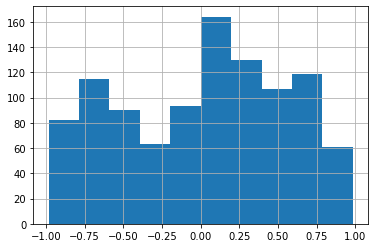

In [65]:
twitter_df.Score.hist()

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
forest = RandomForestRegressor(n_estimators=100)

In [48]:
y = twitter_df.Score.to_numpy()

In [49]:
X = np.array(twitter_df.Vector.to_list())

In [50]:
X.shape

(1024, 300)

In [51]:
y.shape

(1024,)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [71]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [72]:
y_pred = forest.predict(X_test)

In [73]:
forest.score(X_train,y_train), forest.score(X_test,y_test)

(0.9157880292959414, 0.3305543411737105)

In [60]:
import matplotlib.pyplot as plt

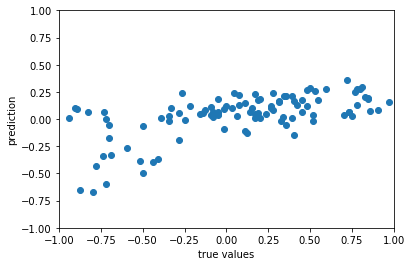

In [74]:
plt.scatter(y_test,y_pred)
plt.xlabel('true values')
plt.ylabel('prediction')
plt.xlim([-1, 1])
plt.ylim([-1, 1]);

Use your trained model from the previous question to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. Review the words with the highest positive and negative sentiment. Do the results make sense?

In [77]:
my_dict = {word:w2v_model.wv[word] for word in w2v_model.wv.vocab.keys()}

In [78]:
df = pd.DataFrame.from_dict(my_dict, orient='index')

In [79]:
df['sentiment_score'] = None

In [81]:
for index, row in df.iterrows():
    if index not in twitter_df['Clean Word'].values:
        df.loc[index,'sentiment_score'] = forest.predict(row[:-1].to_numpy().reshape(1,-1))

In [82]:
df[df.sentiment_score.notnull()].sort_values(by=['sentiment_score'], ascending=False).sentiment_score

arianrhod      0.543155
paganini       0.519407
areumdaun      0.512455
kissable       0.507527
kibo           0.486825
                 ...   
reviled       -0.538996
remorseless     -0.5594
decayed       -0.592835
sadism        -0.601613
castration    -0.614951
Name: sentiment_score, Length: 44574, dtype: object

Sentiment analysis kind of worked. The negative sentiment seems to make sense, the positive less so. However, the word areumdaun actually means 'beautiful' in korean :)

### Visualize Word Vectors
In this section, you'll plot words on a 2D grid based on their inner similarity. We'll use the tSNE transformation to reduce dimensions from 300 to 2. You can get sample code from https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial or other tutorials online.

Perform the following:
- Keep only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.

You might prefer to use a different number of points or a slightly different methodology for improved results.  
Analyze the results.

In [83]:
w2v_model = Word2Vec.load('models/word2vec.model')

INFO - 20:15:07: loading Word2Vec object from models/word2vec.model
INFO - 20:15:07: loading wv recursively from models/word2vec.model.wv.* with mmap=None
INFO - 20:15:07: loading vectors from models/word2vec.model.wv.vectors.npy with mmap=None
INFO - 20:15:07: setting ignored attribute vectors_norm to None
INFO - 20:15:07: loading vocabulary recursively from models/word2vec.model.vocabulary.* with mmap=None
INFO - 20:15:07: loading trainables recursively from models/word2vec.model.trainables.* with mmap=None
INFO - 20:15:07: loading syn1neg from models/word2vec.model.trainables.syn1neg.npy with mmap=None
INFO - 20:15:07: setting ignored attribute cum_table to None
INFO - 20:15:07: loaded models/word2vec.model


In [95]:
genres = np.unique(train.genre.values)

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
vectorizer = CountVectorizer(stop_words='english', max_features=3000)
mostFreqWords = vectorizer.fit_transform(train.clean_lyrics.apply(lambda x: (' '.join(x))).values)

In [99]:
mostFreqWords = mostFreqWords.toarray()

In [100]:
mostFreqWords.shape

(266557, 3000)

In [101]:
wordAbundancePerGenre = np.zeros((len(genres),mostFreqWords.shape[1]))
wordAbundanceTotal = mostFreqWords.sum(axis=0)

for i, genre in enumerate(genres):
    idx = np.argwhere(train.genre.values == genre)
    wordAbundancePerGenre[i,:] = mostFreqWords[idx,:].sum(axis=0) / wordAbundanceTotal

In [102]:
wordAbundancePerGenre.shape

(12, 3000)

In [103]:
Words = np.array(list(vectorizer.vocabulary_.keys()))

In [104]:
Words.shape

(3000,)

In [105]:
top50idx = np.argsort(wordAbundancePerGenre)
top50WordsPerGenre = Words[top50idx[:,-50:]]

In [106]:
top50WordsPerGenre.shape

(12, 50)

In [107]:
topSignificantWords = top50WordsPerGenre.flatten()

In [108]:
topSignificantVectors = []

for word in topSignificantWords:
    if word in w2v_model.wv.vocab:
        topSignificantVectors.append(w2v_model.wv[word])

In [109]:
topSignificantVectors = np.array(topSignificantVectors)

In [110]:
topSignificantVectors.shape

(600, 300)

In [111]:
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

reduc = PCA(n_components=50).fit_transform(topSignificantVectors)
np.set_printoptions(suppress=True)
Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

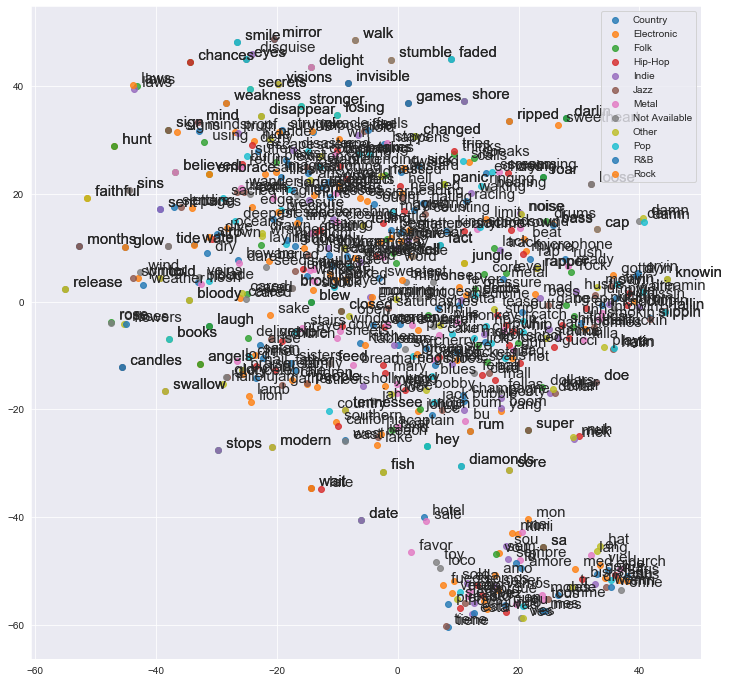

In [112]:
plt.figure(figsize=(12,12))

for i,genre in enumerate(genres):
    Y_curr = Y[i*50:(i+1)*50,:]
    p1 = sns.regplot(Y_curr[:,0],Y_curr[:,1], fit_reg=False)
    for line in range(0, Y_curr.shape[0]):
        p1.text(Y_curr[line,0],Y_curr[line,1],'  ' + top50WordsPerGenre[i,line],
                horizontalalignment='left',
                verticalalignment='bottom', size='medium',weight='normal').set_size(15)
plt.legend(genres)

Not sure what to make of it, but there seem to be a few blobs, a big one and a few small ones down to the right. But it doesn't seem there is any clustering by genre

## Text Classification
In this section, you'll build a text classifier, determining the genre of a song based on its lyrics.

### Text classification using Bag-of-Words
Build a Naive Bayes classifier based on the bag of Words.  
You will need to divide your dataset into a train and test sets.

In [113]:
data = train[train.clean_lyrics.map(lambda d: len(d))>0]

In [119]:
trainset, testset = train_test_split(data, test_size=0.1)

In [120]:
vectorizer = CountVectorizer(stop_words='english', max_features=3000)
trainFreqWords = vectorizer.fit_transform(trainset.clean_lyrics.apply(lambda x: (' '.join(x))).values)
testFreqWords= vectorizer.transform(testset.clean_lyrics.apply(lambda x: (' '.join(x))).values)

In [121]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(trainFreqWords,trainset.genre.values)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [122]:
clf.score(testFreqWords,testset.genre.values)

0.3352306996381182

Show the confusion matrix.

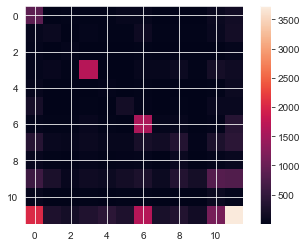

In [123]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = clf.predict(testFreqWords)
plt.imshow(confusion_matrix(testset.genre.values, y_pred))
plt.colorbar()

Show the classification report - precision, recall, f1 for each class.

In [124]:
from sklearn.metrics import classification_report
print(classification_report(testset.genre.values, y_pred))

               precision    recall  f1-score   support

      Country       0.20      0.63      0.30      1414
   Electronic       0.12      0.15      0.13       791
         Folk       0.09      0.22      0.13       217
      Hip-Hop       0.66      0.67      0.66      2511
        Indie       0.04      0.11      0.06       320
         Jazz       0.21      0.27      0.24       753
        Metal       0.37      0.68      0.48      2327
Not Available       0.24      0.08      0.12      2326
        Other       0.07      0.19      0.11       551
          Pop       0.39      0.05      0.09      4053
          R&B       0.04      0.34      0.07       346
         Rock       0.59      0.34      0.43     10919

     accuracy                           0.34     26528
    macro avg       0.25      0.31      0.24     26528
 weighted avg       0.44      0.34      0.34     26528



Pretty poor results on most genres, aside from hip hop and rock. They might be most distinguishable in terms of lyrics than the rest. Also the set is imbalanced...

### Text classification using Word Vectors
#### Average word vectors
Do the same, using a classifier that averages the word vectors of words in the document.

In [125]:
def makeFeatureVec(words, model, num_features):

    featureVec = np.zeros((num_features,))

    nwords = 0
    
    index2word_set = set(model.wv.index2word)
    
    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1
            featureVec = np.add(featureVec,model.wv[word])

    if featureVec.sum()!=0:
        featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(reviews, model, num_features):

    reviewFeatureVecs = np.zeros((len(reviews),num_features))

    for i, review in enumerate(reviews):

        if i%1000 == 0:
            print ("Review %d of %d" % (i, len(reviews)))
       
        reviewFeatureVecs[i] = makeFeatureVec(review, model, num_features)

    return reviewFeatureVecs

In [126]:
trainDataVecs = getAvgFeatureVecs(trainset.clean_lyrics, w2v_model, 300)

Review 0 of 238749
Review 1000 of 238749
Review 2000 of 238749
Review 3000 of 238749
Review 4000 of 238749
Review 5000 of 238749
Review 6000 of 238749
Review 7000 of 238749
Review 8000 of 238749
Review 9000 of 238749
Review 10000 of 238749
Review 11000 of 238749
Review 12000 of 238749
Review 13000 of 238749
Review 14000 of 238749
Review 15000 of 238749
Review 16000 of 238749
Review 17000 of 238749
Review 18000 of 238749
Review 19000 of 238749
Review 20000 of 238749
Review 21000 of 238749
Review 22000 of 238749
Review 23000 of 238749
Review 24000 of 238749
Review 25000 of 238749
Review 26000 of 238749
Review 27000 of 238749
Review 28000 of 238749
Review 29000 of 238749
Review 30000 of 238749
Review 31000 of 238749
Review 32000 of 238749
Review 33000 of 238749
Review 34000 of 238749
Review 35000 of 238749
Review 36000 of 238749
Review 37000 of 238749
Review 38000 of 238749
Review 39000 of 238749
Review 40000 of 238749
Review 41000 of 238749
Review 42000 of 238749
Review 43000 of 238749
R

In [127]:
testDataVecs = getAvgFeatureVecs(testset.clean_lyrics, w2v_model, 300)

Review 0 of 26528
Review 1000 of 26528
Review 2000 of 26528
Review 3000 of 26528
Review 4000 of 26528
Review 5000 of 26528
Review 6000 of 26528
Review 7000 of 26528
Review 8000 of 26528
Review 9000 of 26528
Review 10000 of 26528
Review 11000 of 26528
Review 12000 of 26528
Review 13000 of 26528
Review 14000 of 26528
Review 15000 of 26528
Review 16000 of 26528
Review 17000 of 26528
Review 18000 of 26528
Review 19000 of 26528
Review 20000 of 26528
Review 21000 of 26528
Review 22000 of 26528
Review 23000 of 26528
Review 24000 of 26528
Review 25000 of 26528
Review 26000 of 26528


In [129]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(trainDataVecs,trainset.genre.values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Show the confusion matrix.

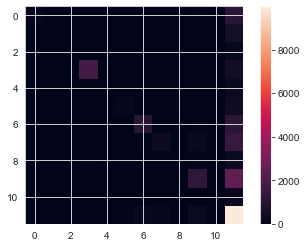

In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = clf.predict(testDataVecs)
plt.imshow(confusion_matrix(testset.genre.values, y_pred))
plt.colorbar()

Show the classification report - precision, recall, f1 for each class.

In [131]:
from sklearn.metrics import classification_report
print(classification_report(testset.genre.values, y_pred))

               precision    recall  f1-score   support

      Country       0.70      0.14      0.23      1414
   Electronic       0.83      0.12      0.21       791
         Folk       0.74      0.09      0.16       217
      Hip-Hop       0.84      0.72      0.78      2511
        Indie       0.75      0.07      0.12       320
         Jazz       0.51      0.22      0.30       753
        Metal       0.72      0.46      0.56      2327
Not Available       0.47      0.16      0.24      2326
        Other       0.29      0.07      0.11       551
          Pop       0.54      0.32      0.40      4053
          R&B       0.59      0.12      0.19       346
         Rock       0.53      0.91      0.67     10919

     accuracy                           0.57     26528
    macro avg       0.63      0.28      0.33     26528
 weighted avg       0.59      0.57      0.52     26528



#### TfIdf Weighting
Do the same, using a classifier that averages the word vectors of words in the document, weighting each word by its TfIdf.


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
num_features = 3000

In [134]:
tfidf = TfidfVectorizer(vocabulary=w2v_model.wv.index2entity[:num_features], stop_words='english')
tf = tfidf.fit_transform(trainset.clean_lyrics.apply(lambda x: (' '.join(x))).values)
embeddings = w2v_model.wv.vectors[:num_features]

temp = tf.toarray()
valid_rows = ~(temp==0).all(1)

avg = (tf[valid_rows] @ embeddings) / np.sum(tf[valid_rows], axis=1)

In [135]:
avg.shape

(238372, 300)

In [136]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(avg,trainset[valid_rows].genre.values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
tf = tfidf.fit_transform(testset.clean_lyrics.apply(lambda x: (' '.join(x))).values)
temp = tf.toarray()
valid_rows = ~(temp==0).all(1)

avg_test = (tf[valid_rows] @ embeddings) / np.sum(tf[valid_rows], axis=1)

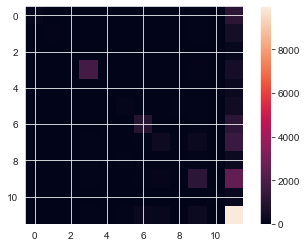

In [138]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_pred = clf.predict(avg_test)
plt.imshow(confusion_matrix(testset[valid_rows].genre.values, y_pred))
plt.colorbar()

In [139]:
print(classification_report(testset[valid_rows].genre.values, y_pred))

               precision    recall  f1-score   support

      Country       0.64      0.12      0.21      1414
   Electronic       0.82      0.12      0.21       788
         Folk       0.67      0.08      0.15       217
      Hip-Hop       0.84      0.70      0.76      2509
        Indie       0.77      0.06      0.12       320
         Jazz       0.49      0.20      0.29       753
        Metal       0.72      0.44      0.55      2311
Not Available       0.45      0.16      0.23      2319
        Other       0.28      0.05      0.09       551
          Pop       0.53      0.29      0.38      4050
          R&B       0.69      0.12      0.20       346
         Rock       0.52      0.91      0.67     10902

     accuracy                           0.56     26480
    macro avg       0.62      0.27      0.32     26480
 weighted avg       0.58      0.56      0.50     26480



### Text classification using ConvNet
Do the same, using a ConvNet.  
The ConvNet should get as input a 2D matrix where each column is an embedding vector of a single word, and words are in order. Use zero padding so that all matrices have a similar length.  
Some songs might be very long. Trim them so you keep a maximum of 128 words (after cleaning stop words and rare words).  
Initialize the embedding layer using the word vectors that you've trained before, but allow them to change during training.  

Extra: Try training the ConvNet with 2 slight modifications:
1. freezing the the weights trained using Word2vec (preventing it from updating)
1. random initialization of the embedding layer

You are encouraged to try this question on your own.  

You might prefer to get ideas from the paper "Convolutional Neural Networks for Sentence Classification" (Kim 2014, [link](https://arxiv.org/abs/1408.5882)).

There are several implementations of the paper code in PyTorch online (see for example [this repo](https://github.com/prakashpandey9/Text-Classification-Pytorch) for a PyTorch implementation of CNN and other architectures for text classification). If you get stuck, they might provide you with a reference for your own code.